## Yucatan Peninsula Hurricanes
Week 4 - Discussion section

**Description:** This data set explores the ecological impacts of hurricanes of the Yucatan Peninsula from 1851 - 2000. Computer modeling was used for analysis.

**Citation:** Boose, E. and D. Foster. 2023. Ecological Impacts of Hurricanes Across the Yucatan Peninsula 1851-2000 ver 23. Environmental Data Initiative. https://doi.org/10.6073/pasta/f219113373913f2daf421732e28d3c38 (Accessed 2025-10-24).

**Date of Access:** 10/24/2025

**Link:** https://portal.edirepository.org/nis/mapbrowse?packageid=knb-lter-hfr.71.23

### 2. Data loading and preliminary exploration

In [1]:
import pandas as pd

# Saving dataset url for import
URL = "https://pasta.lternet.edu/package/data/eml/knb-lter-hfr/71/23/ab0fe2bf4f3ad850371ccb9c69d78469"

hurr = pd.read_csv(URL)

In [2]:
# Access head
hurr.head()

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1


In [3]:
# Checking for NA values
hurr.isna().sum()

code           0
start.date     0
end.date       0
number         0
name          72
ss             0
track          0
rf.max         0
dtype: int64

In [4]:
# Dimensions of df
hurr.shape

(105, 8)

In [5]:
# Data types of columns and number of non-null values 
hurr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   code        105 non-null    object
 1   start.date  105 non-null    object
 2   end.date    105 non-null    object
 3   number      105 non-null    int64 
 4   name        33 non-null     object
 5   ss          105 non-null    int64 
 6   track       105 non-null    object
 7   rf.max      105 non-null    object
dtypes: int64(2), object(6)
memory usage: 6.7+ KB


## 3. Brainstorm

How many hurricanes with Saffir-Simpson category 5 have been registered and what was their duration?

Potential steps:

1. filter data frame for just ss == 5 (or groupby ss)
2. count method to see how many (value_counts?)
3. make duration column where we do end.date - start.date (check data type)

## 4. Data wrangling

In [6]:
# Filter for just hurricans that are category 5 and saving as its own df
cat5 = hurr[hurr['ss'] == 5]
cat5

,code,start.date,end.date,number,name,ss,track,rf.max
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1


In [7]:
# Counting number of categeroy 5 hurricans
cat5.count() # returns 4 for every row

# Better:
cat5.ss.count()

4

There have been four hurricanes with Saffir-Simpson category 5.

In [8]:
# What is the data type of the date column?
cat5['start.date']

76     1955-09-28
96     1980-08-07
98     1988-09-14
103    1998-10-27
Name: start.date, dtype: object

In [9]:
# Changing date variables to be DateTime objects
cat5['start.date'] = pd.to_datetime(cat5['start.date'])
cat5['end.date'] = pd.to_datetime(cat5['end.date'])

/tmp/ipykernel_3294622/2474275701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat5['start.date'] = pd.to_datetime(cat5['start.date'])
/tmp/ipykernel_3294622/2474275701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat5['end.date'] = pd.to_datetime(cat5['end.date'])


In [10]:
cat5['start.date']

76    1955-09-28
96    1980-08-07
98    1988-09-14
103   1998-10-27
Name: start.date, dtype: datetime64[ns]

In [11]:
cat5['end.date']

76    1955-09-28
96    1980-08-08
98    1988-09-15
103   1998-10-28
Name: end.date, dtype: datetime64[ns]

In [12]:
# Adding new column 'duration', which is the difference between end date and start date
cat5['duration'] = cat5['end.date'] - cat5['start.date']

/tmp/ipykernel_3294622/1588492941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat5['duration'] = cat5['end.date'] - cat5['start.date']


In [13]:
cat5

,code,start.date,end.date,number,name,ss,track,rf.max,duration
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3,0 days
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3,1 days
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3,1 days
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1,1 days


**Final Answer:** Most Category 5 hurricanes lasted for a day, with one of the four being less than a day.

## 5: Visualize Saffir-Simpson categories across time

In [26]:
import matplotlib.pyplot as plt
hurr['start.date'] = pd.to_datetime(hurr['start.date']).copy() # warning can be fixed with .copy()
hurr.loc[:, 'start.date'] = pd.to_datetime(hurr['start.date'])
hurr.dtypes

code                  object
start.date    datetime64[ns]
end.date              object
number                 int64
name                  object
ss                     int64
track                 object
rf.max                object
year                   int32
dtype: object

In [19]:
hurr['year'] = hurr['start.date'].dt.year

In [ ]:
hurr

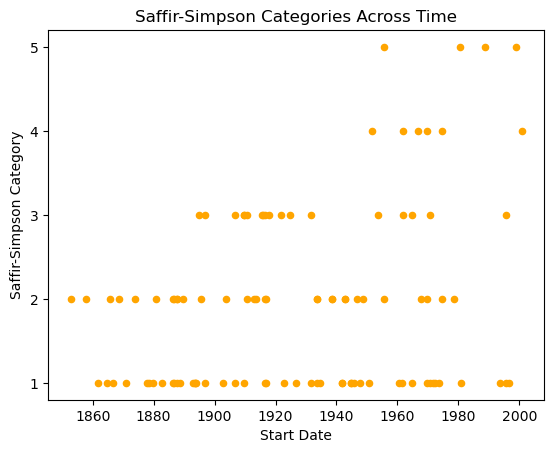

In [20]:
plot = hurr.plot(kind = "scatter",
         x = 'start.date',
         y = 'ss',
         xlabel = 'Start Date',
         ylabel = 'Saffir-Simpson Category',
         title = 'Saffir-Simpson Categories Across Time',
         color = "orange")

plot.set_yticks([1, 2, 3, 4, 5])

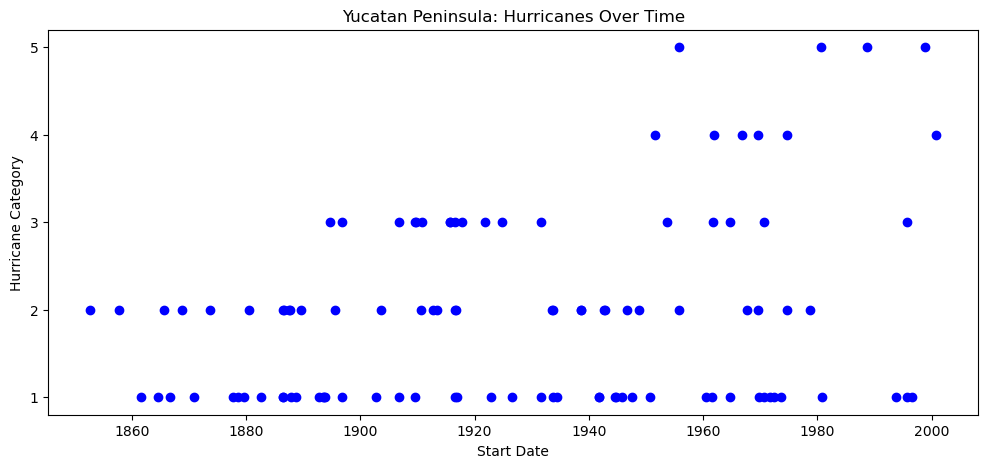

In [28]:
# using fully matplot
fig, ax = plt.subplots(figsize=(12,5))

plt.scatter(hurr['start.date'], hurr['ss'],
            c = "blue")

plt.yticks([1,2,3,4,5])

plt.xlabel('Start Date')
plt.ylabel('Hurricane Category')

plt.title("Yucatan Peninsula: Hurricanes Over Time")

plt.show()